https://www.ritchieng.com/machine-learning-project-customer-segments/

In [1]:
import pandas as pd

data = pd.read_csv('Wholesale customers data.csv')
data.drop(['Channel', 'Region'], axis=1, inplace=True)
print(data.shape)
data.head()

(440, 6)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [2]:
# Statistics
stats = data.describe()
stats

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Selecting Samples

In [3]:
# Select some samples to track
data.loc[[100,200,300],:]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
100,11594,7779,12144,3252,8035,3029
200,3067,13240,23127,3941,9959,731
300,16448,6243,6360,824,2662,2005


We can filter samples that are starkly different based on the quartiles.

In [4]:
fresh_q1 = stats.loc['25%']['Fresh']
frozen_q1 = stats.loc['25%']['Frozen']
frozen_q3 = stats.loc['75%']['Frozen']

* Fresh

In [5]:
data[data['Fresh']<fresh_q1].head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
16,1020,8816,12121,134,4508,1080
31,2612,4339,3133,2088,820,985
34,1502,1979,2262,425,483,395
35,688,5491,11091,833,4239,436
43,630,11095,23998,787,9529,72


* Frozen filter

In [6]:
data[data['Frozen']<frozen_q1].head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
8,5963,3648,6192,425,1716,750
12,31714,12319,11757,287,3881,2931


In [7]:
data[data['Frozen']>frozen_q3].head(7)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
10,3366,5403,12974,4400,5977,1744
22,31276,1917,4469,9408,2381,4334
23,26373,36423,22019,5154,4337,16523
33,29729,4786,7326,6130,361,1083
39,56159,555,902,10002,212,2916


We select three samples from the dataset

In [12]:
indices = [43, 12 ,39]
samples = data.loc[indices,:]
samples.reset_index(drop=True)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,630,11095,23998,787,9529,72
1,31714,12319,11757,287,3881,2931
2,56159,555,902,10002,212,2916


### Comparison of Samples and Means

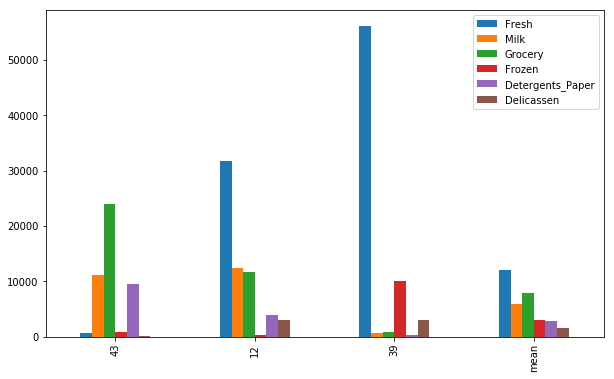

In [23]:
# Get the means 
mean_data = data.describe().loc['mean',:]

# Append means to the samples' data
samples_bar = samples.append(mean_data)

# Plot samples
import seaborn as sns
samples_bar.plot(kind='bar', figsize=(10, 6))

* 43: Very low "Fresh" and very high "Grocery"
* 12: Very low "Frozen" and very high "Fresh"
* 39: Very high "Frozen" and very low "Detergens_Paper"

### Comparing Samples' Percentiles

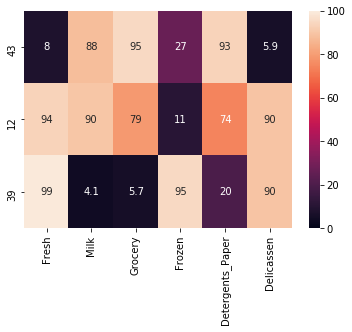

In [60]:
percentiles = data.rank(pct=True)
percentiles = 100*percentiles.round(decimals=3)
percentiles = percentiles.iloc[indices]
sns.heatmap(percentiles, vmin=0, vmax=100, annot=True)